# Exploration of the most used hashtags during both FW

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', 500)

from datetime import timedelta as td
from datetime import datetime

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set_context(rc={"font.family":"sans","font.size":24,"axes.titlesize":24,"axes.labelsize":24})

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
#path = 'Twitter_Bins/Hashtags_Bin/MFW_NYFW_06-25/MFW_NYFW_hashtagUserActivity.csv'
dataset = pd.read_csv('MFW_NYFW_hashtagUserActivity.csv', delimiter = ';')
dataset.head()

,hashtag,nr of tweets with hashtag,distinct users for hashtag,distinct mentions with hashtag,total mentions with hashtag,nr of tweets in selection,nr of users in selection
0,정가람,2,2,1,2,672241,214595
1,배우,65,42,3,48,672241,214595
2,연기자,47,35,2,37,672241,214595
3,영화,39,36,3,37,672241,214595
4,시사회,32,32,1,31,672241,214595


In [ ]:
dataset.describe()

In [3]:
dataset.drop(['nr of tweets in selection', 'nr of users in selection'], axis = 1, inplace = True)

In [ ]:
dataset.sort_values(dataset.columns[1], ascending=False).head(20)

In [ ]:
hist2 = sns.distplot(dataset[dataset['nr of tweets with hashtag']>5000]['nr of tweets with hashtag'], bins=100)
hist2.set_title('Distribution and Density of mentions')
plt.xlim(left=4000,right=50000)
plt.grid(axis='x')

In [ ]:
dataset['tweets_per_user'] = (dataset['nr of tweets with hashtag']/dataset['distinct users for hashtag'])
dataset.head()

In [ ]:
dataset.sort_values(dataset.columns[2], ascending=False).head(20)

In [ ]:
dataset[dataset['nr of tweets with hashtag'] > 5000].sort_values(dataset.columns[5], ascending = False).head(20)

In [ ]:
dataset.sort_values(dataset.columns[5], ascending=False).head(20)

In [4]:
d5 = dataset[dataset['nr of tweets with hashtag'] > 7499]

In [ ]:
d5.shape

In [ ]:
d5.head()

In [ ]:
dtop = dataset.sort_values(dataset.columns[1], ascending=False)

In [ ]:
dtop.head()

In [ ]:
dtop = dtop.iloc[:20,:]

In [ ]:
dtop.shape

In [ ]:
plt.figure(figsize=(10,10))
s = sns.barplot(x = 'nr of tweets with hashtag', y = 'hashtag', data = dtop)
s.set_xscale('log') 


In [5]:
twhash = pd.read_csv('Hashtags_fullExport_clean.csv')

In [ ]:
twhash.head()

In [6]:
twhash.drop(['withheld_copyright', 'withheld_scope', 'truncated', 'to_user_name', 'in_reply_to_status_id', 'quoted_status_id', 'lat', 'lng', 'from_user_utcoffset', 'from_user_timezone', 'from_user_lang', 'from_user_withheld_scope'],axis = 1, inplace = True)

In [ ]:
twhash.shape

In [7]:
hashlite = twhash[['id', 'from_user_name', 'text', 'retweet_count', 'favorite_count', 'lang', 'location', 'from_user_id', 'from_user_realname', 'from_user_verified', 'from_user_description', 'from_user_followercount', 'mentions', 'hashtags', 'is_retweet', 'clean_text']]

In [ ]:
hashlite.head()

In [8]:
hashlite['hash'] = hashlite['hashtags'].str.split(';')

In [9]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = hashlite.loc[
                       hashlite.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [ ]:
hashtags_list_df.head()

In [10]:
hashtags_list_df['hashtags'] = hashtags_list_df['hashtags'].str.split(';')
hashtags_list_df.head()

,hashtags
0,"[정가람, 배우, 연기자, 영화, 시사회, junggaram, style..."
1,"[sovogueswiss, watchporn, watchaddict, watc..."
2,"[AlejandroBetancourt, Fashion, Trendy, Desi..."
3,"[Fashion, style, threadLace]"
4,"[fashion, indiedev, women, gamedev, amazon..."


In [11]:
hashtags_list_df.dropna(inplace = True)

In [12]:
hashtags_list_df['hashtag'] = hashtags_list_df.hashtags.apply(
    lambda hashtag_list: [hashtag.lower() for hashtag in hashtag_list])

In [13]:
hashtags_list_df['hashtag2'] = hashtags_list_df.hashtag.apply(
    lambda hashtag_list: [hashtag.strip(' ') for hashtag in hashtag_list])

In [ ]:
# create dataframe where each use of hashtag gets its own row
#flattened_hashtags_df = pd.DataFrame(
  #  [hashtag for hashtags_list in hashtags_list_df.hashtags
  #  for hashtag in hashtags_list],
   # columns=['hashtag'])

In [14]:
# take hashtags which appear at least this amount of times
#min_appearance = 10000
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(d5['hashtag'])

In [ ]:
popular_hashtags_set

In [15]:
popular_hashtags_set.remove('poshmark')
popular_hashtags_set.remove('fashion')
popular_hashtags_set.remove('style')
popular_hashtags_set.remove('follow')
#popular_hashtags_set.remove('followme')

In [ ]:
d5.head()

In [ ]:
hashtags_list_df.head()

In [16]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtag2.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])

In [17]:
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

In [ ]:
hashtags_list_df.head()

In [18]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [19]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

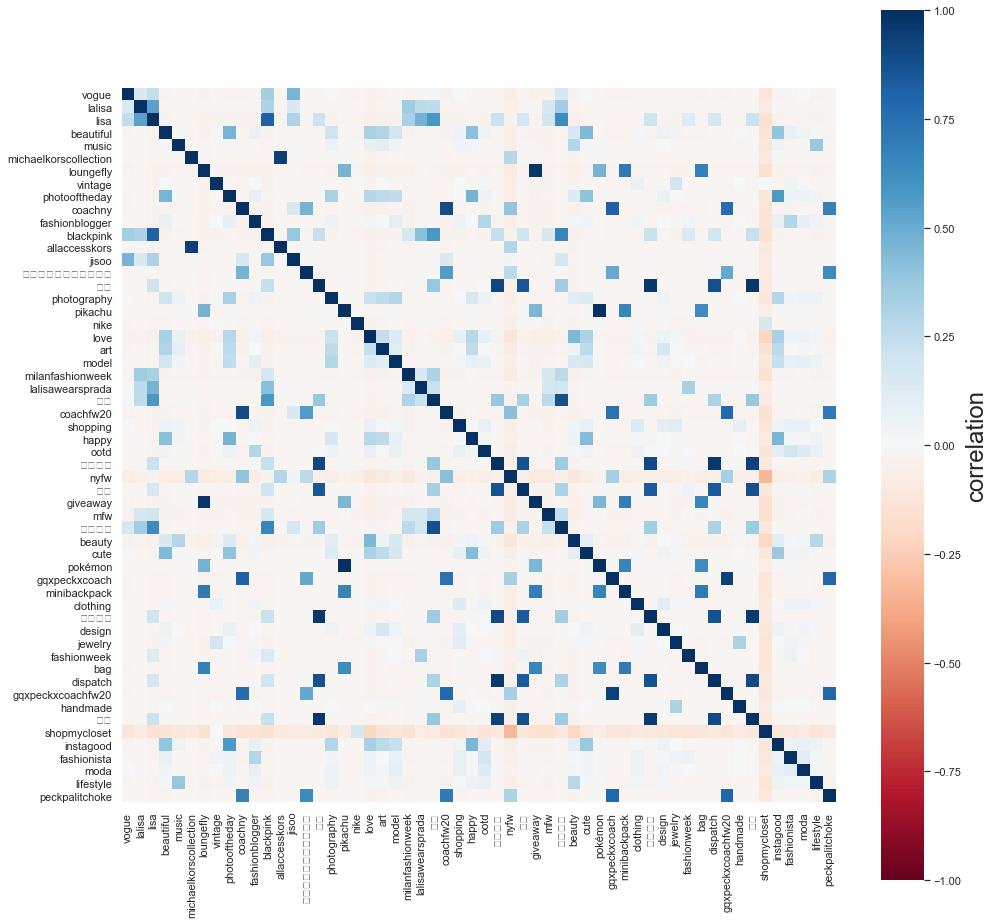

In [20]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(16,16))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
#plt.savefig("corr1.png")
plt.show()

In [21]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(correlations, 50))

Top Absolute Correlations
pikachu                pokémon              0.999999
출국                     공항패션                 0.999722
                       공항                   0.999659
loungefly              giveaway             0.999543
공항패션                   공항                   0.999356
디스패치                   dispatch             0.998876
michaelkorscollection  allaccesskors        0.998472
gqxpeckxcoach          gqxpeckxcoachfw20    0.998383
디스패치                   공항                   0.998197
출국                     디스패치                 0.997094
디스패치                   공항패션                 0.996682
dispatch               공항                   0.996148
coachny                coachfw20            0.995003
출국                     dispatch             0.994945
공항패션                   dispatch             0.994688
디스패치                   패션                   0.994683
패션                     공항                   0.994413
                       dispatch             0.993286
출국                  

In [ ]:
mibrands = pd.read_csv('MIFW.csv', delimiter = ';')
mibrands.head()

In [ ]:
nybrands = pd.read_csv('NYFW.csv', delimiter = ';')
nybrands.head()

In [ ]:
mibrands = mibrands[['BRAND', 'TWITTER']]
nybrands = nybrands[['Brand', 'Twitter']]
nybrands = nybrands.iloc[:70, :]
nybrands = nybrands.rename(columns={"Brand": "BRAND", "Twitter": "TWITTER"})

In [ ]:
brands = pd.concat([mibrands, nybrands])

In [ ]:
brands.dropna(inplace = True)

In [ ]:
# take hashtags which appear at least this amount of times
#min_appearance = 10000
# find popular hashtags - make into python set for efficiency
popular_brands_set = set(brands['TWITTER'])

In [ ]:
hashtags_list_df['hashtag'] = hashtags_list_df.hashtags.apply(
    lambda hashtag_list: [hashtag.lower() for hashtag in hashtag_list])

hashtags_list_df.dropna(inplace = True)

In [ ]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_brands'] = hashtags_list_df.hashtag.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_brands_set])

# drop rows without popular hashtag
popular_brands_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_brands.apply(lambda hashtag_list: hashtag_list !=[])]

In [ ]:
# make new dataframe
hashtag_vector_df = popular_brands_list_df.loc[:, ['popular_brands']]

In [ ]:
for hashtag in popular_brands_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_brands.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [ ]:
brand_matrix = hashtag_vector_df.drop('popular_brands', axis=1)

In [ ]:
# calculate the correlation matrix
correlations_brand = brand_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(correlations_brand,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [27]:
tw = pd.read_csv('twitter.csv')

In [28]:
tw.drop(['urls', 'urls_expanded', 'urls_followed', 'domains', 'HTTP status code','withheld_copyright', 'withheld_scope', 'truncated', 'to_user_name', 'in_reply_to_status_id', 'quoted_status_id', 'lat', 'lng', 'from_user_utcoffset', 'from_user_timezone', 'from_user_lang', 'from_user_withheld_scope'],axis = 1, inplace = True)

In [29]:
tw.head()

,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,retweet_count,favorite_count,lang,source,location,from_user_id,from_user_realname,from_user_verified,from_user_description,from_user_url,from_user_profile_image_url,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_created_at,mentions,hashtags
0,1225314274983190529,1580972663,2020-02-06 07:04:23,agathardlp,RT @ParaTiOnline: La diseñadora Agatha Ruiz de...,none,NaN,1,0,es,"<a href=""http://twitter.com/download/iphone"" r...","Madrid, Milano, París, Bogotá",63172126,Agatha RuizdelaPrada,1,Design&Arts,http://t.co/9xR7uoS4Fg,http://pbs.twimg.com/profile_images/725322687/...,25535,34221,80,8772,314,2009-08-05 16:03:15,ParaTiOnline; ParaTiOnline,agatharuizdelaprada; madrid; mfw; agatharuizde...
1,1225314561596809217,1580972731,2020-02-06 07:05:31,agathardlp,RT @ParaTiOnline: La diseñadora Agatha Ruiz de...,none,NaN,1,0,es,"<a href=""http://twitter.com/download/iphone"" r...","Madrid, Milano, París, Bogotá",63172126,Agatha RuizdelaPrada,1,Design&Arts,http://t.co/9xR7uoS4Fg,http://pbs.twimg.com/profile_images/725322687/...,25535,34221,80,8772,314,2009-08-05 16:03:15,ParaTiOnline,agatharuizdelaprada; madrid; mfw
2,1225317676748169216,1580973474,2020-02-06 07:17:54,dikanind,RT @MensHumor: Fashion Week has truly risen to...,none,NaN,6,0,en,"<a href=""http://twitter.com/download/android"" ...","Jakarta, INDONESIA",26261609,Dika Anindyajati,0,full-time weekender. part-time engineer. loves...,NaN,http://pbs.twimg.com/profile_images/5052449979...,13217,340,270,373,7,2009-03-24 15:52:37,MensHumor,NaN
3,1225317776065208320,1580973497,2020-02-06 07:18:17,skenxxieco,RT @BoF: Fashion month is upon us. But what do...,none,0.0,12,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",mars,466191679,scar-yeet coedashian,0,yozen frogurt,NaN,http://pbs.twimg.com/profile_images/6030360185...,76712,202,546,12892,3,2012-01-17 04:36:58,BoF,NaN
4,1225317911419486210,1580973530,2020-02-06 07:18:50,markieemarxh,RT @miloismybaby: Mark was supposed to attend ...,none,NaN,1920,0,en,"<a href=""http://twitter.com/download/android"" ...",FarAway Land,947526434750324736,삼월❤,0,AHGASE🐦 | MarkJin🐰🍑💖💙 | JYPNATION/GGs | I retw...,NaN,http://pbs.twimg.com/profile_images/1220013140...,72276,94,148,30677,0,2017-12-31 17:54:41,miloismybaby; GOT7Official; jypnation,TreatMarkBetter


In [30]:
tw['ment'] = tw['mentions'].str.split(';')

In [31]:
# take the rows from the hashtag columns where there are actually hashtags
mentions_list_df = tw.loc[
                       tw.ment.apply(
                           lambda mentions_list: mentions_list !=[]
                       ),['ment']]

mentions_list_df.head()

,ment
0,"[ParaTiOnline, ParaTiOnline]"
1,[ParaTiOnline]
2,[MensHumor]
3,[BoF]
4,"[miloismybaby, GOT7Official, jypnation]"


In [36]:
mentions_list_df.ment[0][1]

' ParaTiOnline'

In [ ]:
#mentions_list_df['ment'] = hashtags_list_df['hashtags'].str.split(';')
#mentions_list_df.head()

In [37]:
mentions_list_df.dropna(inplace = True)

In [40]:
mentions_list_df['ment2'] = mentions_list_df.ment.apply(
    lambda mention_list: [ment.strip(' ') for ment in mention_list])

In [42]:
mentions_list_df.ment2[0][1]

'ParaTiOnline'

In [43]:
# create dataframe where each use of hashtag gets its own row
flattened_mentions_df = pd.DataFrame(
    [mention for mentions_list in mentions_list_df.ment2
    for mention in mentions_list],
    columns=['menti'])

In [44]:
flattened_mentions_df.head()

,menti
0,ParaTiOnline
1,ParaTiOnline
2,ParaTiOnline
3,MensHumor
4,BoF


In [45]:
# count of appearances of each hashtag
popular_mentions = flattened_mentions_df.groupby('menti').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [48]:
# take hashtags which appear at least this amount of times
min_appearance = 1000
# find popular hashtags - make into python set for efficiency
popular_mentions_set = set(popular_mentions[
                           popular_mentions.counts>=min_appearance
                           ]['menti'])

In [49]:
mentions_list_df.head()

,ment,ment2
0,"[ParaTiOnline, ParaTiOnline]","[ParaTiOnline, ParaTiOnline]"
1,[ParaTiOnline],[ParaTiOnline]
2,[MensHumor],[MensHumor]
3,[BoF],[BoF]
4,"[miloismybaby, GOT7Official, jypnation]","[miloismybaby, GOT7Official, jypnation]"


In [50]:
# make a new column with only the popular hashtags
mentions_list_df['popular_mentions'] = mentions_list_df.ment2.apply(
            lambda mention_list: [mention for mention in mention_list
                                  if mention in popular_mentions_set])
# drop rows without popular hashtag
popular_mentions_list_df = mentions_list_df.loc[
            mentions_list_df.popular_mentions.apply(lambda mention_list: mention_list !=[])]


In [51]:
# make new dataframe
mention_vector_df = popular_mentions_list_df.loc[:, ['popular_mentions']]

for mention in popular_mentions_set:
    # make columns to encode presence of hashtags
    mention_vector_df['{}'.format(mention)] = mention_vector_df.popular_mentions.apply(
        lambda mention_list: int(mention in mention_list))

In [52]:
mention_matrix = mention_vector_df.drop('popular_mentions', axis=1)

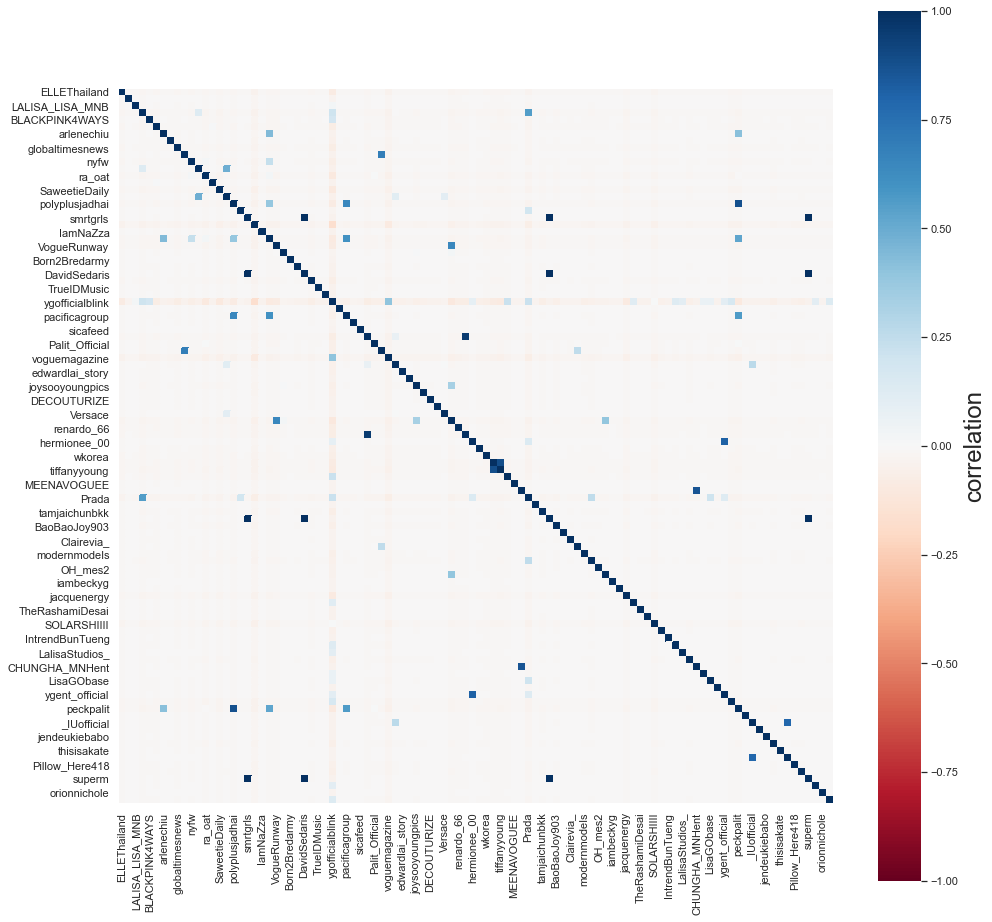

In [58]:
# calculate the correlation matrix
correlation_ment = mention_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(16,16))
sns.heatmap(correlation_ment,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [59]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(correlation_ment, 50))

Top Absolute Correlations
smrtgrls         DavidSedaris       1.000000
DavidSedaris     superm             1.000000
smrtgrls         superm             1.000000
JimmyKimmelLive  superm             1.000000
DavidSedaris     JimmyKimmelLive    1.000000
smrtgrls         JimmyKimmelLive    1.000000
weareoneEXO      WORLDMUSICAWARD    0.997069
xotiffanypics    tiffanyyoung       0.993013
Chungha_CN       CHUNGHA_MNHent     0.989289
hermionee_00     ygent_official     0.980355
polyplusjadhai   peckpalit          0.952467
_IUofficial      edam_ent           0.950287
_rowoonist       SF9official        0.915157
polyplusjadhai   pacificagroup      0.913259
pacificagroup    peckpalit          0.872204
Coach            pacificagroup      0.842937
                 peckpalit          0.840277
VogueRunway      RVsmtown           0.838214
BritishVogue     Prada              0.793978
Moschino         VVFriedman         0.771049
polyplusjadhai   Coach              0.740143
arlenechiu       Coach       